In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
  estimators=[('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
  voting='hard'
)

In [33]:
from sklearn.metrics import accuracy_score
def show_pred():
  for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
show_pred()

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.896


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

#### 使用軟投票法

硬: 每個分類器選出一類，取最多的那類作為預測結果

軟：每個分類器都對每一類做出可能預測(predict_prob)，再加總所有預測值算出最高的類

In [34]:
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
  estimators=[('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
  voting='soft'
)
show_pred()

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.928


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to accou

### bagging, pasting

前面展示獲得不同種分類器的方法之一是使用不同訓練算法(模型)

還有另一種方法是用相同算法，但在不同的訓練集隨機子集上訓練。

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500, #  訓練 n 個分類器
    max_samples=100, # 每次取 100
    bootstrap=True, # 放回樣本 (bagging)
    n_jobs=-1 # 一次運行多少 job (-1 : using all processes)
)

In [36]:
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

#### 使用包外評估

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True # 包外評估
)
bag_clf.fit(X_train,y_train)
print("oob_score: ",bag_clf.oob_score_)
y_pred = bag_clf.predict(X_test)
print("accuracy: ",accuracy_score(y_test, y_pred))

oob_score:  0.8933333333333333
accuracy:  0.912


### 隨機森林

In [38]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print("accuracy: ",accuracy_score(y_test,y_pred_rf))

accuracy:  0.912


以下使用BaggingClassifier，與上面的 RandomForest 大致相同

In [39]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
)
bag_clf.fit(X_train,y_train)
y_pred_bg = bag_clf.predict(X_test)
print("accuracy: ",accuracy_score(y_test, y_pred_bg))

accuracy:  0.912


### 極端隨機樹

每棵樹搜索**隨機閾值**而非**最佳閾值**

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

ex_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ex_clf.fit(X_train, y_train)

y_pred_ex = ex_clf.predict(X_test)
print("accuracy: ",accuracy_score(y_test,y_pred_ex))

accuracy:  0.912


#### 使用交叉驗證

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf,X_train, y_train,scoring="accuracy", cv=10)
print("隨機森林:",scores.mean())

隨機森林: 0.9120041093725304


In [42]:
scores = cross_val_score(ex_clf,X_train, y_train,scoring="accuracy", cv=10)
print("極端隨機樹:",scores.mean())

極端隨機樹: 0.8989924134660976


### 特徵重要性

越重要的特徵傾向出現在靠近根節點的位置，不重要的特徵出現在葉節點的位置，甚至不出現

scikit-learn 的隨機樹模型有 feature_importances_ 包含這個計算結果

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
print("以下顯示各個特徵重要程度:")
for name,score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

以下顯示各個特徵重要程度:
sepal length (cm) 0.0969750038006626
sepal width (cm) 0.02367321305473619
petal length (cm) 0.4306464710661563
petal width (cm) 0.4487053120784446


### 提升法 Boosting

逐步在集成中添加預測器

#### AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5
)

ada_clf.fit(X_train,y_train)
accuracy_score(y_test, ada_clf.predict(X_test))

0.896

### 梯度提升

計算前個集成的殘差

In [45]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [47]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
X_new = X_new = np.array([[0.8]])
print(X_new)
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

[[0.8]]


array([0.75026781])

In [49]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

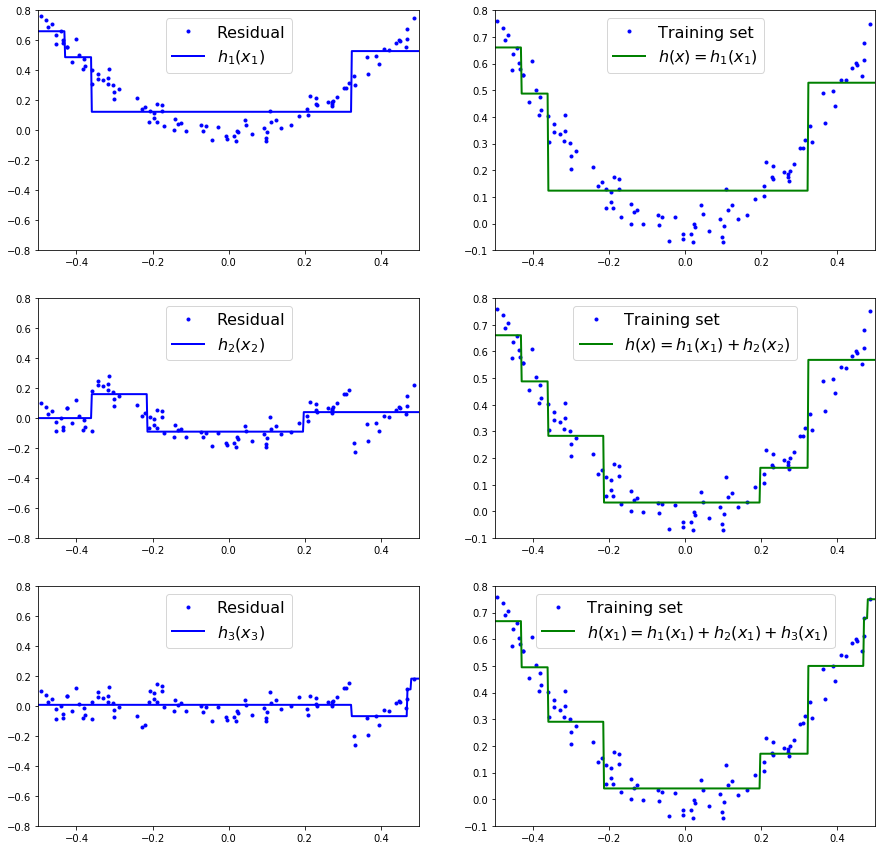

In [50]:
trees = [tree_reg1, tree_reg2, tree_reg3]
ys = [y,y2,y3]
fx = [
    "$h(x)=h_1(x_1)$",
    "$h(x)=h_1(x_1)+h_2(x_2)$",
    "$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$"
]
plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,2,i*2+1)
    plot_predictions([trees[i]], X, ys[i], axes=[-0.5, 0.5, -0.8, 0.8], label="$h_{}(x_{})$".format(i+1,i+1), style="b-", data_label="Residual")
for i in range(3):
    plt.subplot(3,2,i*2+2)
    plot_predictions(trees[:(i+1)], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label=fx[i], style="g-", data_label="Training set")
plt.show()

#### 使用 Scikit-learn 的 GBRT集成

等同上例的三個集成

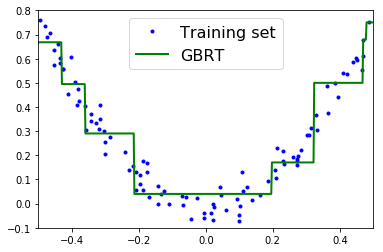

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)
plot_predictions([gbrt],X,y,axes=[-0.5, 0.5, -0.1, 0.8], label="GBRT", style="g-", data_label="Training set")

#### 早期停止

GBRT 有 stage_predict 每個集成的預測

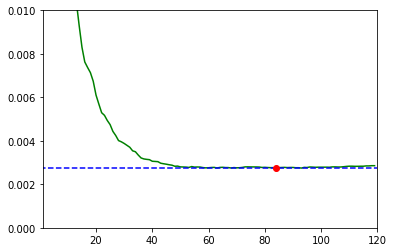

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) # return 最小值的index

def draw_loss(erros, bst_n_estimators,axis):
    bst_error = errors[bst_n_estimators]
    # plt.figure(figsize=(10,5))
    plt.axis(axis)
    plt.plot(errors,"g-")
    plt.plot([0,120],[bst_error,bst_error],"b--")
    plt.plot(bst_n_estimators,bst_error,'ro')
    plt.show()

draw_loss(errors,bst_n_estimators, [1,120,0,0.01])

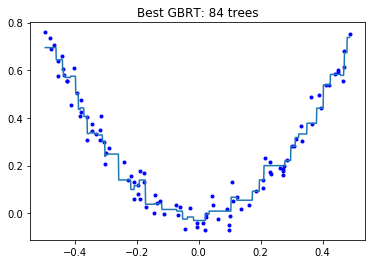

In [53]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

plt.plot(X,y,"b.")
x1 = np.linspace(X.min(), X.max(), 1000)
plt.plot(x1,gbrt_best.predict(x1.reshape(-1,1)))
plt.title("Best GBRT: {} trees".format(bst_n_estimators))
plt.show()


#### 提前停止訓練，不需要訓練大量的樹再回頭尋找最優

設置 warm_start=True 當 fit() 方法調用會保留現有的樹

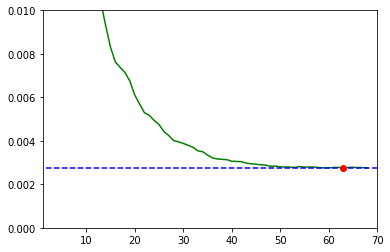

In [54]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")

error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up=0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break
errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
draw_loss(errors,bst_n_estimators, [1,len(errors)+1,0,0.01])

### Ex 7

In [94]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

data, label = mnist["data"], mnist["target"]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [95]:
data.shape

(70000, 784)

In [96]:
suffle_index = np.random.permutation(len(data))
data = data[suffle_index]
label = label[suffle_index]
X_train, y_train = data[:40000], label[:40000]
X_val, y_val = data[40000:50000], label[40000:50000]
X_test, y_test = data[50000:60000], label[50000:60000]

In [97]:
from sklearn.svm import LinearSVC

random_forest_clf = RandomForestClassifier(random_state=42)
extra_trees_clf = ExtraTreesClassifier(random_state=42)
svm_clf = LinearSVC(random_state=42)

estimators = [random_forest_clf,extra_trees_clf,svm_clf]

for estimator in estimators:
    print("Training the", estimators)
    estimator.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training the [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty=

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training the [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', ra

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [98]:
names = ["Random Forest","Extra Trees","SVM"]
scores = [estimator.score(X_val, y_val) for estimator in estimators]
for i in range(len(names)):
    print('{0: <15}'.format(names[i]),scores[i])

Random Forest   0.9401
Extra Trees     0.9415
SVM             0.8513


In [99]:
named_estimators = [(names[i],estimators[i]) for i in range(len(names))]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
       ... max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [100]:
voting_clf.score(X_val, y_val)

0.9415

In [112]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9401, 0.9415]

#### 移除最差的 SVM

In [102]:
voting_clf.set_params(SVM=None)
# 重新 fit 一次

# 或是直接移除
del voting_clf.estimators_[2]
voting_clf.score(X_val,y_val)

0.9351

#### 軟投票法

In [103]:
voting_clf.voting = 'soft'
voting_clf.score(X_val, y_val)

0.9557

#### 測試集

In [113]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9365, 0.9423]

In [114]:
voting_clf.score(X_test,y_test)

0.9542